# My first Decision Tree: with Pokemon
### Mi primer Árbol de decisión: con Pokémon

# Creación de la Tabla de Pokémon
Como primer paso, debemos recordar que nuestra computadora no es capaz de entender las "tarjetas" de los Pokémon que utilizamos en el Powerpoint cuando realizamos nuestro árbol de decisión manual. Así que si queremos que nuestra computadora sea capaz de realizar su propio árbol, primero tendremos que darle esa información en forma de tabla.

El siguiente bloque de código importa una tabla de datos de Pokémon utilizando la librería de pandas.

In [ ]:
import pandas as pd
datos_pokemon = pd.read_csv('datos_pokemon.csv')
datos_pokemon

,Unnamed: 0,Peso,Altura,Pies,Tipo,Color_Amarillo,Color_Azul,Color_Gris,Color_Morado,Color_Rojo,Color_Verde
0,0,5.0,0.6,2,Planta,0,0,0,0,0,1
1,1,6.9,0.7,4,Planta,0,0,0,0,0,1
2,2,1.0,0.6,2,Planta,0,0,0,0,0,1
3,3,35.0,1.0,2,Planta,0,1,0,0,0,0
4,4,29.5,1.0,6,Planta,0,0,0,0,1,0
5,5,1.8,0.3,0,Planta,1,0,0,0,0,0
6,6,5.8,0.4,2,Planta,0,0,0,0,0,1
7,7,3.0,0.8,2,Planta,0,1,0,0,0,0
8,8,152.0,1.8,0,Agua,0,1,0,0,0,0
9,9,12.0,0.6,0,Agua,0,0,1,0,0,0


# Transformación de Variables
Los **árboles de decisión** son algoritmos de Machine Learning que no requieren grandes transformaciones de variables. Aunque es posible transformar las variables para "normalizarlas" utilizando logaritmos, raíces, etc., **para este algoritmo** rara vez es necesario hacer esto.

Para este caso no haremos transformaciones numéricas (veamos qué resultados obtenemos).



# Creación del Árbol de Decisión
Una vez que tenemos nuestros datos preparados (todos en forma numérica y con las transformaciones que hayamos querido aplicar), ¡es momento de que nuestra computadora aprenda! ¿Parece sencillo, no?

El siguiente bloque de código funciona así:
* Línea 1: importar de una librería de Python llamada "Scikit learn" el algoritmo de Árbol de Decisión.
* Línea 2: configurar el algoritmo (indicar su profundidad máxima, la pureza mínima en sus hojas, etc.). Para este primer ejercicio no modificaremos nada de nuestro algoritmo, todos serán valores "default", por eso el paréntesis irá vacío.
* Línea 3: introducir los datos al algoritmo y entrenarlo utilizando "fit". Observa que en el paréntesis indicamos primero las columnas que corresponden a las variables predictoras (Peso, Altura, Color, Pies) y después la variable objetivo (Tipo).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
bilybob = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_features = "auto", max_depth = 5, class_weight = "balanced")
variables = ['Peso','Altura','Pies','Color_Amarillo','Color_Azul','Color_Gris','Color_Morado','Color_Rojo','Color_Verde']
X = datos_pokemon[variables].to_numpy()
y = datos_pokemon['Tipo']
bilybob.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features='auto', splitter='random')

# Predicciones con el Árbol de Decisión
¡Tu algoritmo ya está entrenado! Y tu computadora ya debería ser capaz de "adivinar" el tipo de un Pokémon utilizando los datos de Peso, Altura, Color y el # de Pies. ¿Quieres probarlo?

Utilizando datos que nuestra computadora NO conoce, veamos qué tal le va haciendo predicciones. Aquí te dejo algunos de Pokémon que nuestra computadora NO ha visto (sus datos no están en la tabla original de 22 Pokémon).

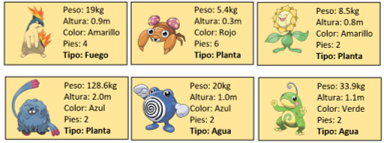

Para realizar la predicción únicamente tienes que introducir en los corchetes [ ] los datos de [[Peso, Altura, Color, Pies]], con sus valores numéricos (tienes que seguir el código de colores que utilizamos cuando creamos las variables dummies). Por ejemplo, para el primer Pokémon debes introducir los datos de la siguiente manera:

[[19, 0.9, 4, 1, 0, 0, 0, 0, 0]]

Cambia los datos por los valores de cada Pokémon y revisa si nuestra computadora fue capaz de adivinar su tipo.

In [ ]:
# Peso, Altura, Pies, Amarillo, Azul, Gris, Morado, Rojo, Verde
pokemon = [[33.9, 1.1, 2, 0, 0, 0, 0, 0, 1]]
print(bilybob.predict(pokemon))
print(bilybob.predict_proba(pokemon)*100)

['Planta']
[[  0.   0. 100.]]


In [ ]:
lista_pokemon = [
    [128.6, 2.0, 2, 0, 1, 0, 0, 0, 0],
    [5.4, 0.3, 6, 0, 0, 0, 0, 1, 0],
    [20, 1.0, 2, 0, 1, 0, 0, 0, 0],
    [8.5, 0.8, 2, 1, 0, 0, 0, 0, 0],
    [33.9, 1.1, 2, 0, 0, 0, 0, 0, 1]

]

In [ ]:
print(bilybob.predict(lista_pokemon))
print(bilybob.predict_proba(lista_pokemon)*100)

['Agua' 'Planta' 'Planta' 'Fuego' 'Planta']
[[100.           0.           0.        ]
 [  0.           0.         100.        ]
 [  0.           0.         100.        ]
 [  0.          65.85365854  34.14634146]
 [  0.           0.         100.        ]]


Mi queridísimo Bilybob no mejoró, mi más grande pésame :(

**† RIP BILYBOB †**    2022-2022


Lizette Cuevas

# Dibujando tu árbol de decisión
¿Tienes curiosidad sobre cómo es que tu árbol de decisión hizo las clasificaciones? Con el siguiente bloque de código podrás visualizarlo :D

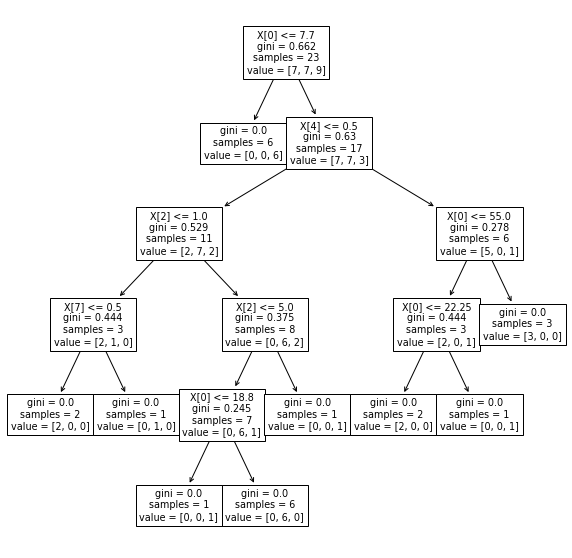

In [ ]:
import sklearn.tree as tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(bilybob)